<a href="https://colab.research.google.com/github/abdullatif14/Supervised-and-Unsupervise-with-R/blob/main/R_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Defining the Question

The research problem in this case is to find out individuals that are likely to click on a blog advert based on their characteristics which include; Age Daily Time spent on site Area of residence Internet Usage Gender Country of residence

##Metric For Success

1. Performing EDA

2. Univariate Analysis

3. Bivariate Analysis

##Data Relevance

The data provided by the client is from the performance of a previous blog advert on the same website. The columns are as follows:
 Daily Time Spent on the site-Integer, 
 
 Age-Age of the individual browsing-Integer,
 
  Area of residence Internet Usage
  
   Gender of the browsing individual Country of Residence

##Understanding the context

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads.

##Experimental Design

1. Reading the Data

2. Data cleaning 

3. EDA

4. Conclusion

###Reading and Cleaning the data

In [120]:
ad <- read.csv('/content/advertising.csv')
head(ad)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [121]:
str(ad)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


In [122]:
# lets check for missing data
length(which(is.na(ad)))

# we can see there are no missing values

[1] 0

In [123]:
# double checking for missing values in any of the columns
colSums(is.na(ad))

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0

In [124]:
# checking for duplicates
duplicated <- ad[duplicated(ad),]
length(duplicated)

[1] 10

In [125]:
unique_items <- ad[!duplicated(ad), ]

# What about seeing what these unique items are?
# ---
length(unique_items)

[1] 10

In [126]:
 #Lets check for outliers
boxplot.stats(ad$Daily.Internet.Usage)

$stats
[1] 104.780 138.790 183.130 218.795 269.960

$n
[1] 1000

$conf
[1] 179.1326 187.1274

$out
numeric(0)

In [127]:
# Checking for outliers in the daily time spent on the site

boxplot.stats(ad$Clicked.on.Ad)

$stats
[1] 0.0 0.0 0.5 1.0 1.0

$n
[1] 1000

$conf
[1] 0.450036 0.549964

$out
integer(0)

##Univariate analysis

Central Tendency

In [43]:
# Doing the central tendency for area income

print(mean(ad$Area.Income))
print(median(ad$Area.Income))
print(min(ad$Area.Income))
print(max(ad$Area.Income))
print(range(ad$Area.Income))
print(quantile(ad$Area.Income))
print(var(ad$Area.Income))
print(sd(ad$Area.Income))


[1] 55000
[1] 57012.3
[1] 13996.5
[1] 79484.8
[1] 13996.5 79484.8
      0%      25%      50%      75%     100% 
13996.50 47031.80 57012.30 65470.64 79484.80 
[1] 179952406
[1] 13414.63


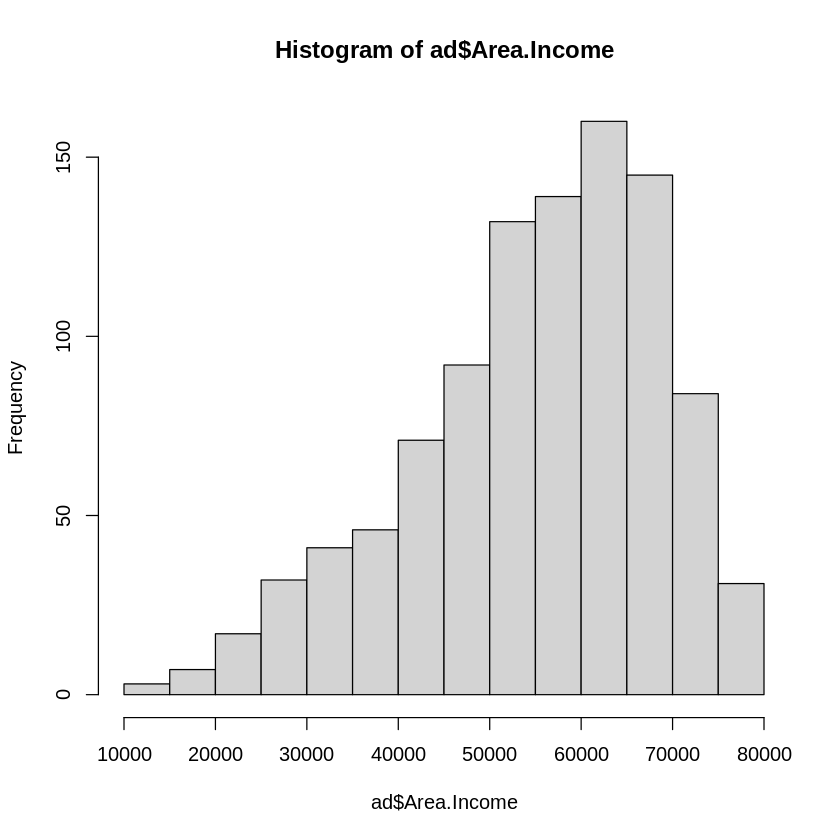

In [44]:
#plotting a histrogram to visualize the distribution
hist(ad$Area.Income)

In [45]:
# working on the central tendency of Daily.Internet.Usage

print(mean(ad$Daily.Internet.Usage))
print(median(ad$Daily.Internet.Usage))
print(min(ad$Daily.Internet.Usage))
print(max(ad$Daily.Internet.Usage))
print(range(ad$Daily.Internet.Usage))
print(quantile(ad$Daily.Internet.Usage))
print(var(ad$Daily.Internet.Usage))
print(sd(ad$Daily.Internet.Usage))

[1] 180.0001
[1] 183.13
[1] 104.78
[1] 269.96
[1] 104.78 269.96
      0%      25%      50%      75%     100% 
104.7800 138.8300 183.1300 218.7925 269.9600 
[1] 1927.415
[1] 43.90234


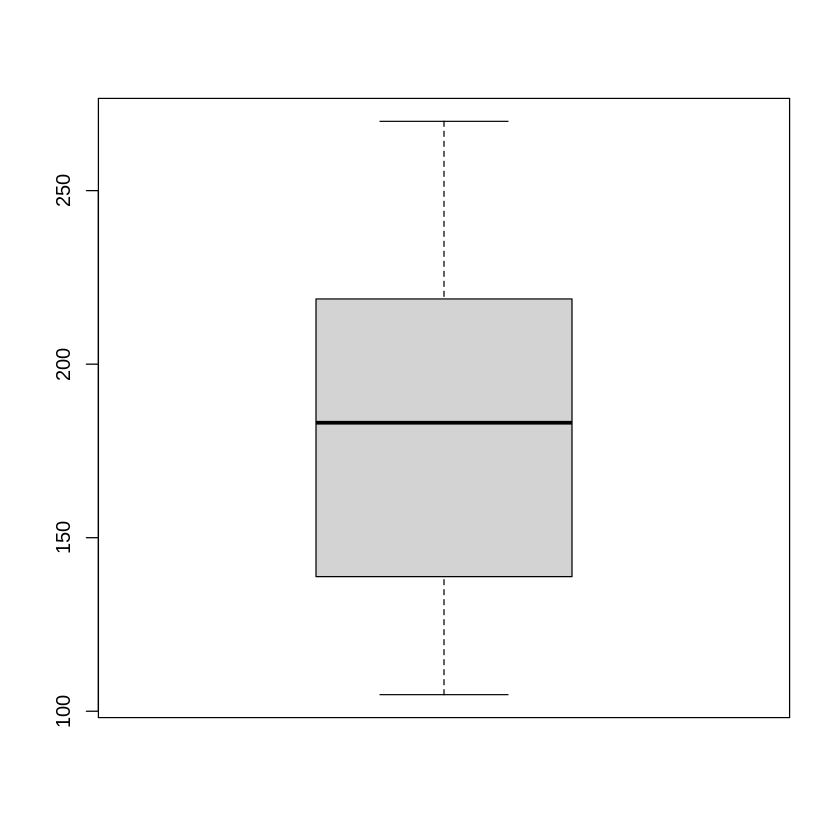

In [46]:
#lets visualize it using a boxplot
boxplot(ad$Daily.Internet.Usage)

In [47]:
# Central tendency of the Daily.Time.Spent.on.Site

print(mean(ad$Daily.Time.Spent.on.Site))
print(median(ad$Daily.Time.Spent.on.Site))
print(min(ad$Daily.Time.Spent.on.Site))
print(max(ad$Daily.Time.Spent.on.Site))
print(range(ad$Daily.Time.Spent.on.Site))
print(quantile(ad$Daily.Time.Spent.on.Site))
print(var(ad$Daily.Time.Spent.on.Site))
print(sd(ad$Daily.Time.Spent.on.Site))

[1] 65.0002
[1] 68.215
[1] 32.6
[1] 91.43
[1] 32.60 91.43
     0%     25%     50%     75%    100% 
32.6000 51.3600 68.2150 78.5475 91.4300 
[1] 251.3371
[1] 15.85361


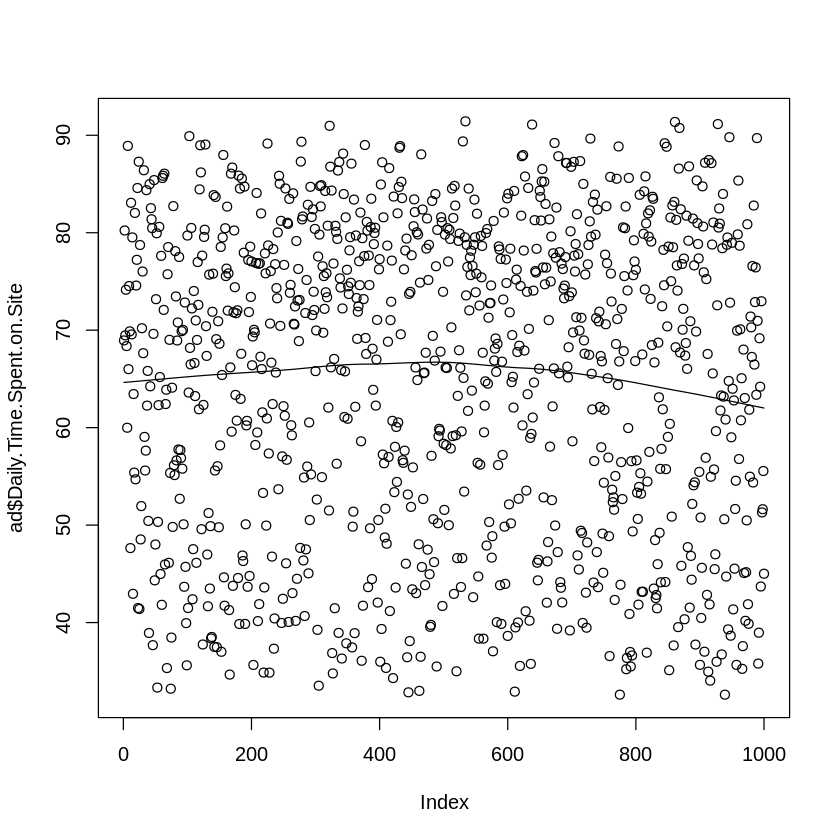

In [48]:
# plotting a scatter plot
scatter.smooth(ad$Daily.Time.Spent.on.Site)

Clicked
  0   1 
500 500 

Gender
  0   1 
519 481 

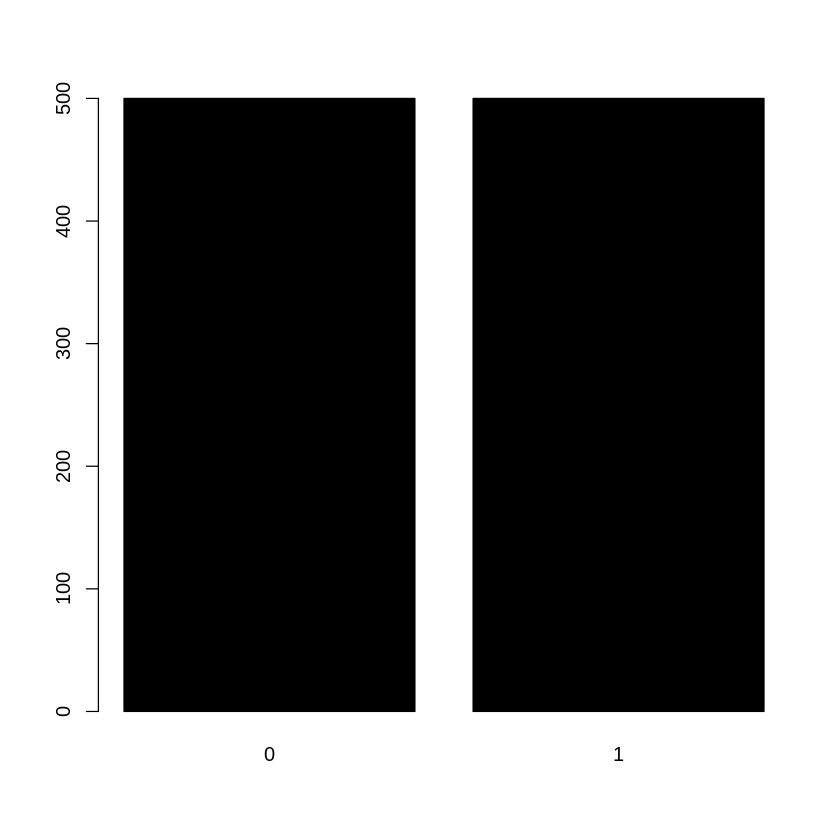

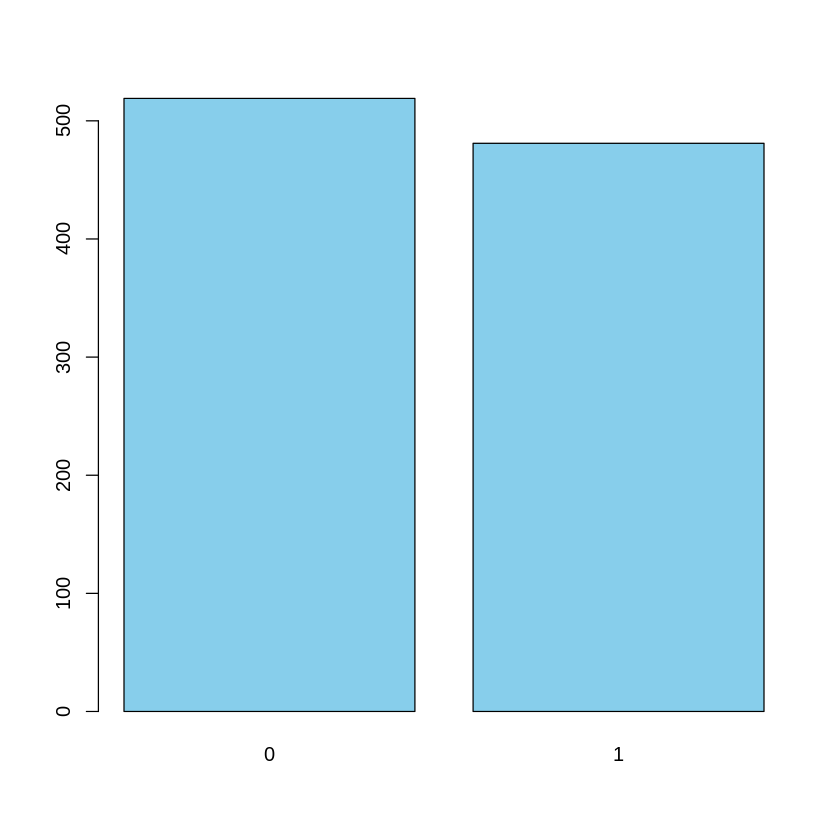

In [49]:

Clicked <- ad$Clicked.on.Ad
Clicked_frequency<- table(Clicked)
Clicked_frequency
barplot(Clicked_frequency,col="Black")


Gender <- ad$Male
Gender_frequency<- table(Gender)
Gender_frequency
barplot(Gender_frequency,col="Skyblue")

##Bivariate Analysis

In [50]:
str(ad)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


**Covariance**

In [51]:
# lets get the covariance between the time spent on the site and clicking on the ad

Daily.Time.Spent.on.Site <- ad$Daily.Time.Spent.on.Site
Age <- ad$Age
cov(Daily.Time.Spent.on.Site, Age)

[1] -46.17415

In [52]:
#Checking the covariance of daily internet usage and clicked on ad

Clicked.on.Ad <- ad$Clicked.on.Ad
Daily.Internet.Usage <- ad$Daily.Internet.Usage
cov(Clicked.on.Ad, Daily.Internet.Usage)

[1] -17.27409

In [53]:
# Checking the covariance of the area income and the daily internet usage
Area.Income <- ad$Area.Income
Daily.Internet.Usage <- ad$Daily.Internet.Usage
cov(Daily.Internet.Usage,Area.Income)

[1] 198762.5

In [54]:

#Covariance of daily time spent on site and Daily.Internet.Usage.
Daily.Internet.Usage <- ad$Daily.Internet.Usage
Daily.Time.Spent.on.Site <- ad$Daily.Time.Spent.on.Site
cov(Daily.Time.Spent.on.Site, Daily.Internet.Usage)

[1] 360.9919

**Correlation**

In [55]:
# lets get the correlation between the time spent on the site and clicking on the ad

Daily.Time.Spent.on.Site <- ad$Daily.Time.Spent.on.Site
Age <- ad$Age
cor(Daily.Time.Spent.on.Site, Age)

[1] -0.3315133

In [56]:
#Checking the correlation of daily internet usage and clicked on ad

Clicked.on.Ad <- ad$Clicked.on.Ad
Daily.Internet.Usage <- ad$Daily.Internet.Usage
cor(Clicked.on.Ad, Daily.Internet.Usage)

[1] -0.7865392

In [57]:
# Checking the correlation of the area income and the daily internet usage
Area.Income <- ad$Area.Income
Daily.Internet.Usage <- ad$Daily.Internet.Usage
cor(Daily.Internet.Usage,Area.Income)

[1] 0.3374955

In [58]:
#Correlation of daily time spent on site and Daily.Internet.Usage.
Daily.Internet.Usage <- ad$Daily.Internet.Usage
Daily.Time.Spent.on.Site <- ad$Daily.Time.Spent.on.Site
cor(Daily.Time.Spent.on.Site, Daily.Internet.Usage)

[1] 0.5186585

**Scatter plots**

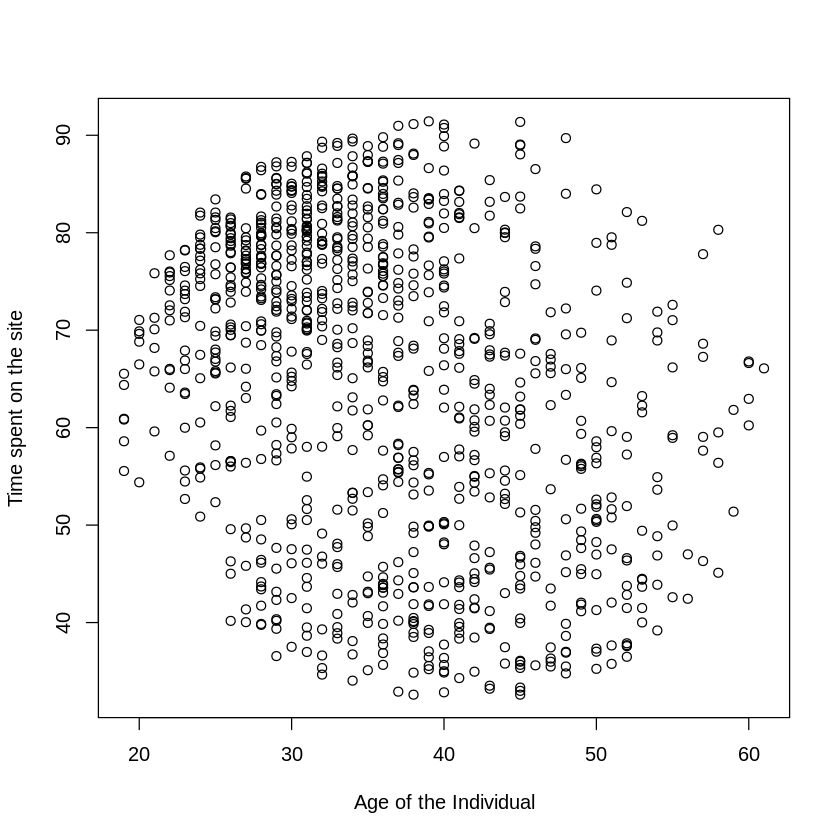

In [59]:
# plotting a sctter on the ages against the time spent on the site
plot(Age, Daily.Time.Spent.on.Site, xlab="Age of the Individual", ylab="Time spent on the site")

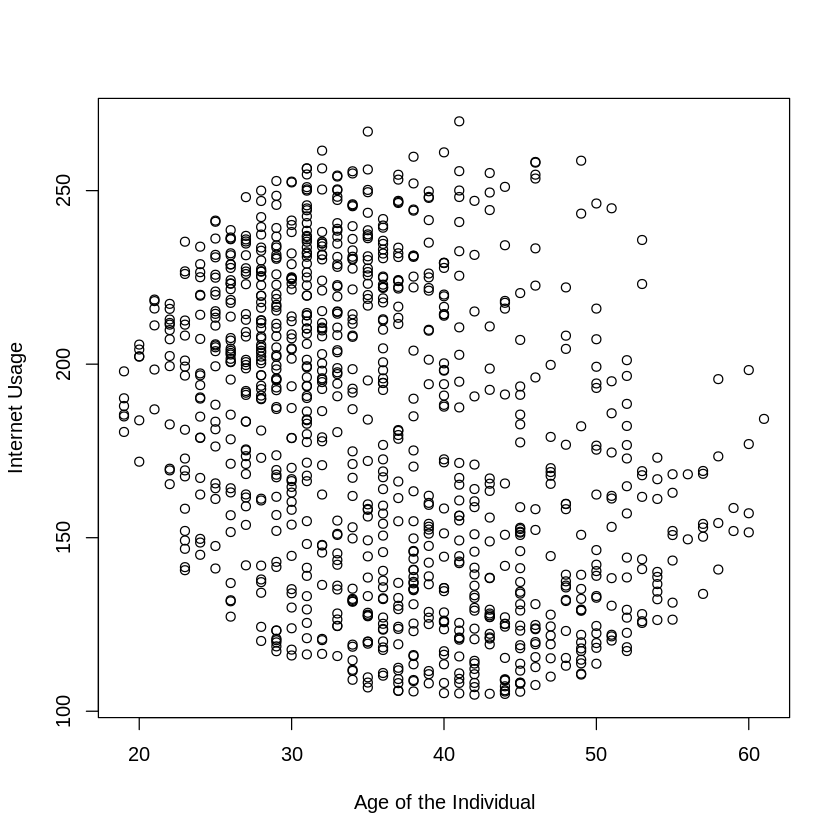

In [60]:
# plotting a scatter on the age againt the internet usage
plot(Age, Daily.Internet.Usage, xlab="Age of the Individual", ylab="Internet Usage")

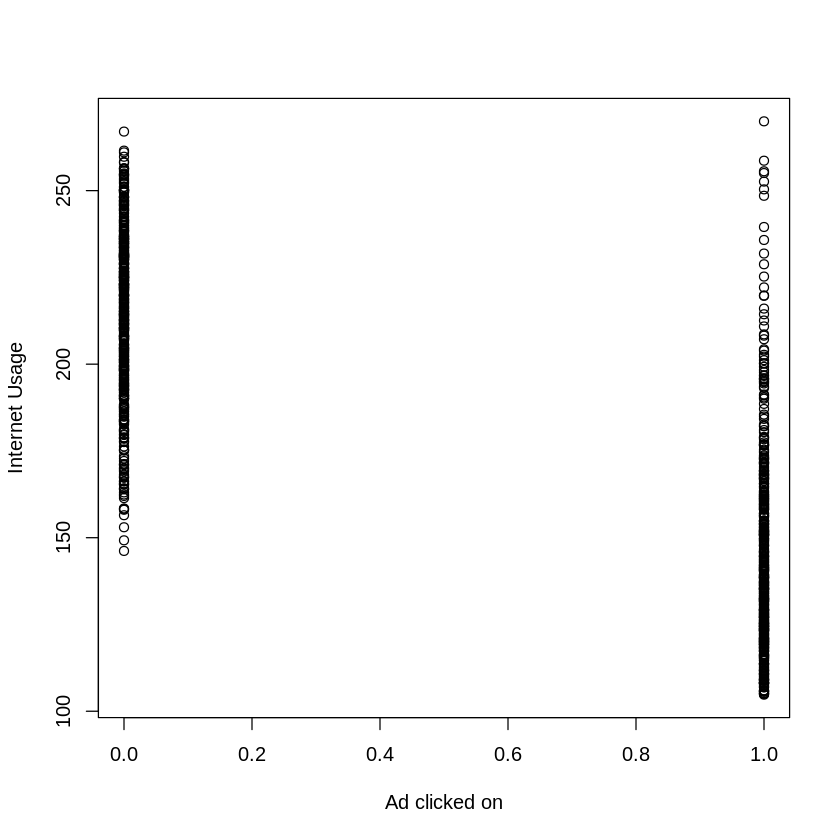

In [61]:

plot(Clicked.on.Ad, Daily.Internet.Usage, xlab="Ad clicked on", ylab="Internet Usage")

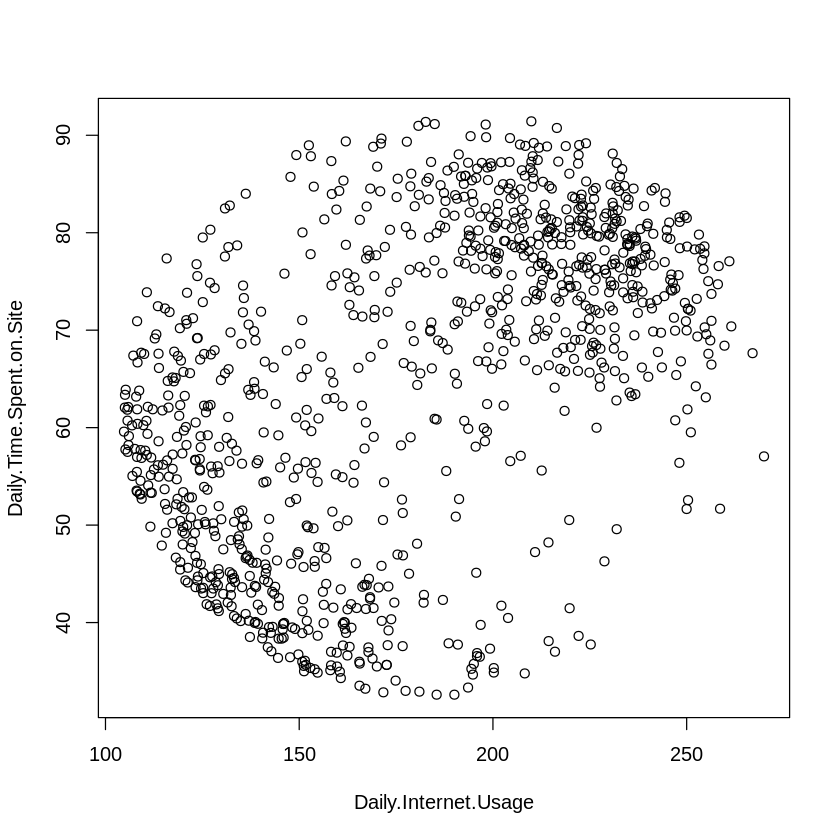

In [62]:
plot(Daily.Internet.Usage, Daily.Time.Spent.on.Site, xlab="Daily.Internet.Usage", ylab="Daily.Time.Spent.on.Site")

**Conclusion**

1. More females were found to click on the ad (519) than men(481)

2. The Highest area income was found to be 79484

3. The range of the daily internet usage is between 140 - 270 mbs

4. Atleast each person spends 32 minutes on the site daily

5. There was an equal number of those who clicked and those who didn't

##Implementation 

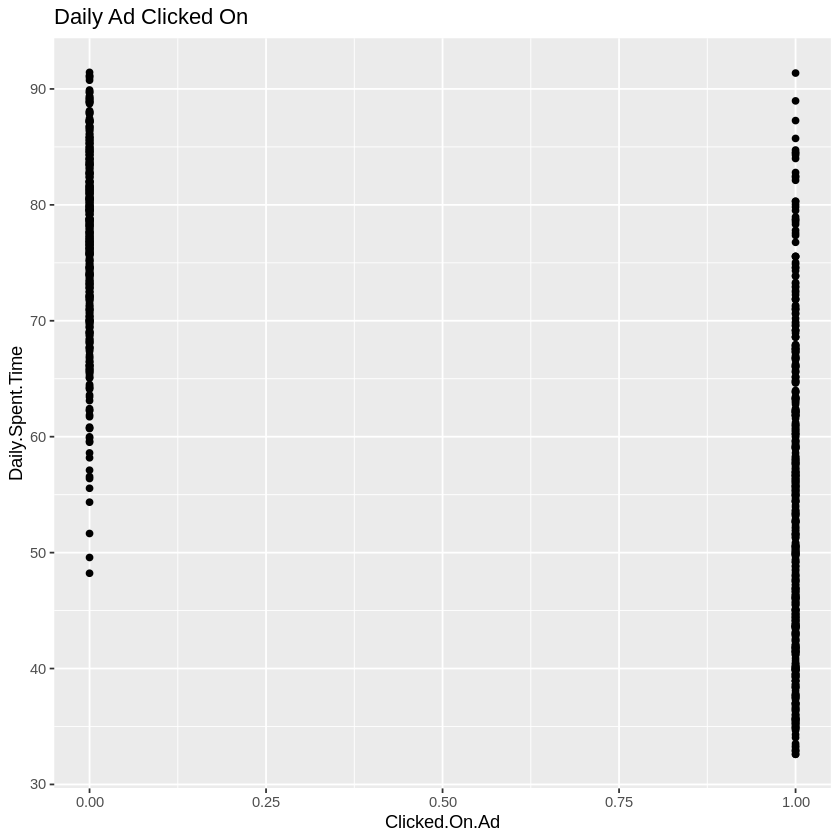

In [64]:
# checking for linearity
library(ggplot2)

ggplot(ad, aes(Clicked.on.Ad, Daily.Time.Spent.on.Site))+
  geom_point()+
  labs(title = "Daily Ad Clicked On",
       x = "Clicked.On.Ad",
       y = "Daily.Spent.Time")

# There isn't any Collinearity between the two variables 

**Modelling**

In [74]:
dim(ad)

[1] 1000   10

In [135]:
# Import ggplot2 because diamonds dataset is in ggplot2 package
library(ggplot2)

# Loading the diamonds dataset
head(ad)
 
# Storing it as data frame
ad1 <- data.frame(ad)

# Creating a random number equal 90% of total number of rows
ran <- sample(1:nrow(ad1),0.9 * nrow(ad1))
 
# The Normalization function is created
nor <-function(x) { (x -min(x))/(max(x)-min(x))   }

# Normalization function is applied to the dataframe
ad_nor <- as.data.frame(lapply(ad[,c(1:4,9)], nor))

# The training dataset extracted
ad_train <- ad_nor[ran,]
 # The test dataset extracted
ad_test <- ad_nor[-ran,]
 
# The 2nd column of training dataset because that is what we need to predict about testing dataset
# also convert ordered factor to normal factor
ad_target <- as.factor(ad1[ran,2])
 
# The actual values of 2nd column of testing dataset to compaire it with values that will be predicted
# also convert ordered factor to normal factor
test_target <- as.factor(ad1[-ran,2])

# Running the knn function
library(class)
pr <- knn(dia_train,ad_test,cl=ad_target,k=20)
 
# Creating the confucion matrix
tb <- table(pr,test_target)
 
# Checking the accuracy
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tb)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


ERROR: ignored

In [136]:
install.packages("gmodels")
library(gmodels)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’


